<a href="https://colab.research.google.com/github/Pedrovalad/Pedro_Valadares_DS/blob/main/Airbnb_Santiago%2C_An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Santiago, Chile*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Santiago no Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://data.insideairbnb.com/chile/rm/santiago/2023-12-26/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* license — coluna vazia.
* number_of_reviews_ltm — números de reviews (avaliações) nos últimos 12 meses.


In [ ]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,49392,Rental unit in Santiago · 1 bedroom · 1 bed,224592,Maria,Providencia,-33.43277,-70.59892,Private room,47300.0,3,0,NaN,0.00,1,178,0
1,52811,Rental unit in Providencia · ★4.42 · 1 bedroom...,244792,Cristián,Providencia,-33.42959,-70.61880,Entire home/apt,48193.0,1,45,2021-11-04,0.28,3,86,0
2,513333,Home in Santiago · ★4.86 · 2 bedrooms · 1 bed ...,55685236,María José,Providencia,-33.42932,-70.59085,Private room,15000.0,1,70,2019-11-03,0.54,1,239,0
3,529207,Home in Santiago · 1 bedroom · 7 beds · 6 baths,2294459,Cristian,Peñalolén,-33.47754,-70.51952,Private room,533814.0,5,0,NaN,0.00,1,365,0
4,53494,Rental unit in Santiago · ★4.76 · 2 bedrooms ·...,249097,Paulina,Lo Barnechea,-33.34521,-70.29543,Entire home/apt,149999.0,2,37,2021-05-22,0.41,1,365,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas: \t{}'.format(df.shape[0]))
print('Variáveis: \t{}'.format(df.shape[1]))

Entradas: 	12284
Variáveis: 	18


In [ ]:
# verificar os tipos de variáveis

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### Q1.1. Convertendo os valores da coluna "Price" de pesos para reais.

Para trabalharmos com parâmetros mais relacionados à nossa realidade, os preços da coluna "Price" foram convertidos de peso chileno para reais. Isso foi feito utilizando a taxa de câmbio do dia 17 de abril de 2024.

In [ ]:
#Para melhorar a análise dos valores da coluna "Price", vamos converter os valores para reais, utilizando a taxa de câmbio de 17/04/2024

taxa_de_cambio = 187  # 187 pesos = 1 real

# Substituindo a coluna 'price' com os valores convertidos para reais
df['price'] = df['price'] / taxa_de_cambio




### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A análise de valores ausentes é fundamental para decidirmos com quais variáveis vamos trabalhar na análise exploratória. Coluna com alto número de valores null podem ser desconsideradas em um primeiro momento.

Com relação aos valores ausentes, podemos tratá-los, principalmente, de duas formas: imputação (preencher com determinado valor) ou remoção.

No caso deste Dataset, optou-se por imputar 0 aos valores ausentes na coluna "reviews_per_month". Já para as colunas "neighbourhood_group" e "license", que estão vazias, optou-se por removê-las por completo.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

# Preencher os valores NA da coluna reviews_per_month
df.reviews_per_month.fillna(0, inplace=True)

# Remover variáveis que não vazias
df.drop(['neighbourhood_group','license'], axis = 1, inplace = True)


### **Q3. Qual o tipo de distribuição das variáveis?**
A análise dos histogramas nos permite entender melhor quais variáveis apresentam outliers, que podem estar desbalanceando a distribuição e também prejudicando a análise exploratória.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

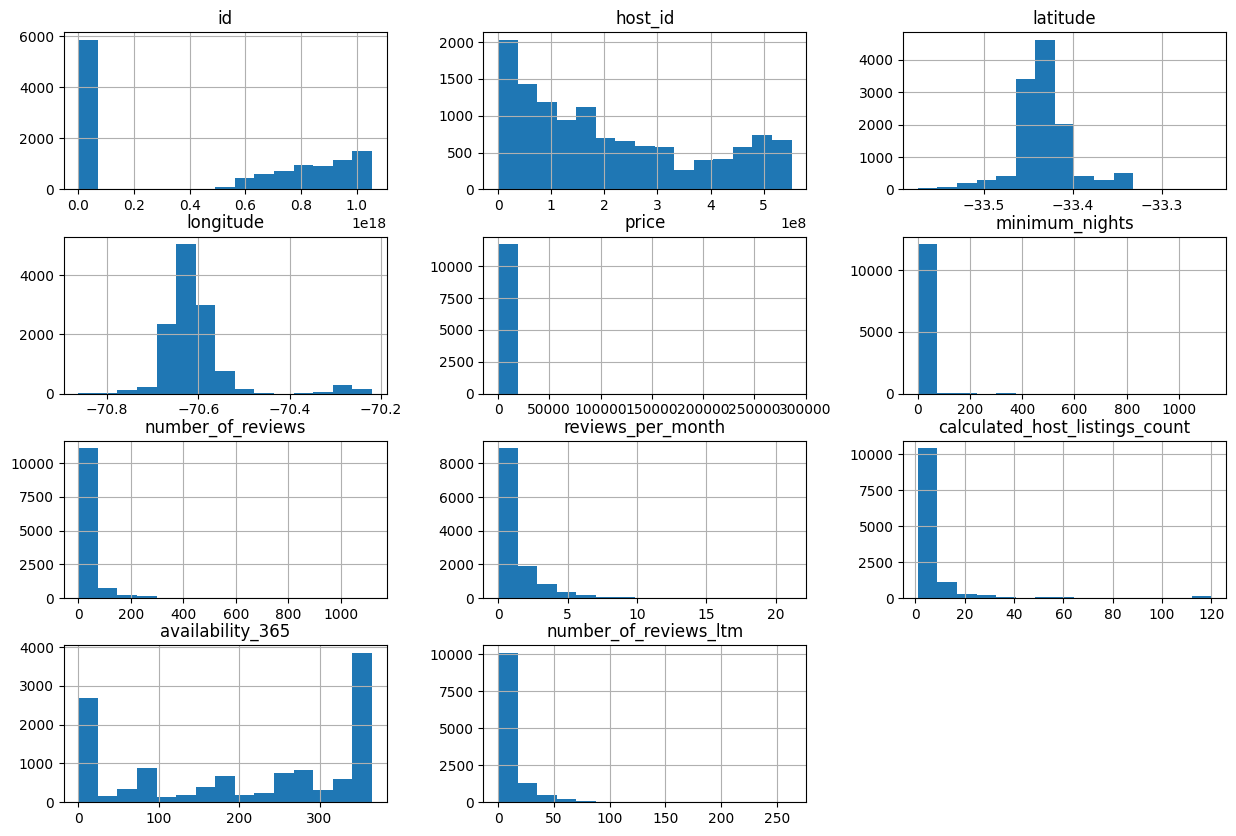

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize =(15,10))

### **Q4.Há outliers presentes?**

Em uma primeira análise da variáveis numéricas, é possível ver uma discrepância grande entre os valores da média e da mediana, assim como uma diferença elevada entre o valor máximo e o valor do terceiro quartil.

Essas duas constatações nos permitem deduzir que há outliers no nosso conjunto de dados.

Os boxplots da variáveis "price" e "minimum_nights" confirmam isso. Por isso, decidiu-se, em um primeiro momento, por criar uma cópia do Data Frame com a remação dos outliers.

O intervalo escolhido para remoção foi feito de forma arbitrária, para que excluíssemos menos de 1% das nossas entradas em cada uma das variáveis.

Note que, com a retirada de parte dos outliers, a distribuição nos histogramas fica bem mais interessante.



In [ ]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11748.000000,12284.000000,12284.000000,12284.000000,12284.000000,12284.000000
mean,486.232185,6.701075,25.571638,1.127016,5.557473,206.266281
std,4465.407963,37.112770,52.609307,1.656341,13.610707,143.097168
min,41.069519,1.000000,0.000000,0.000000,1.000000,0.000000
25%,160.427807,1.000000,1.000000,0.020000,1.000000,63.000000
50%,226.788770,2.000000,6.000000,0.450000,1.000000,256.000000
75%,340.898396,3.000000,26.000000,1.590000,4.000000,355.000000
max,286350.775401,1124.000000,1118.000000,21.130000,120.000000,365.000000


### Boxplot para "minimum_nights

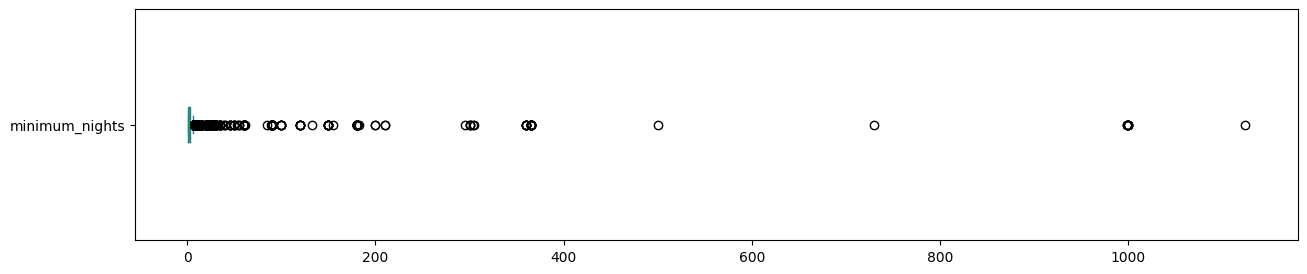

minimum_nights: valores acima de 90:
105 entradas
0.8548%


In [ ]:
#minimum_nights

df.minimum_nights.plot(kind = "box", vert = False, figsize = (15,3))
plt.show()

# ver quantidade de valores acima de 90 dias para minimum_nights
print("minimum_nights: valores acima de 90:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4}%".format((len(df[df.minimum_nights > 90])/df.shape[0])*100))

### Boxplot para "price"

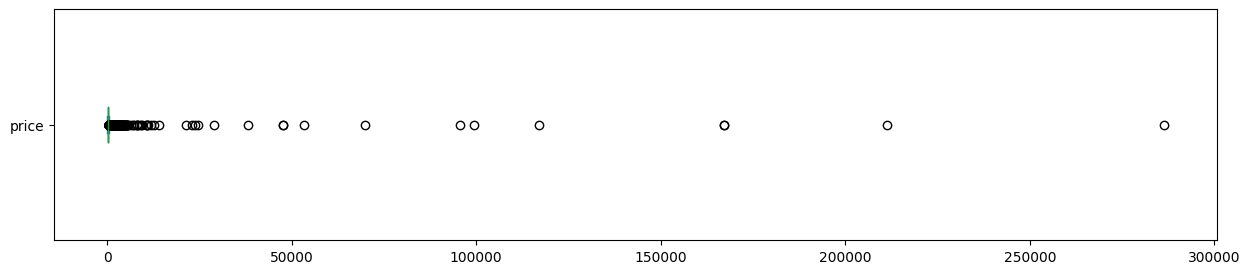


price: valores acima de 2700
110 entradas
0.8955%


In [ ]:
#price
df.price.plot(kind = "box", vert = False, figsize = (15,3))
plt.show()

# ver quantidade de valores acima de 2700 para price
print("\nprice: valores acima de 2700")
print("{} entradas".format(len(df[df.price > 2700])))
print("{:.4f}%".format((len(df[df.price > 2700]) / df.shape[0])*100))

### Remoção de outliers

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

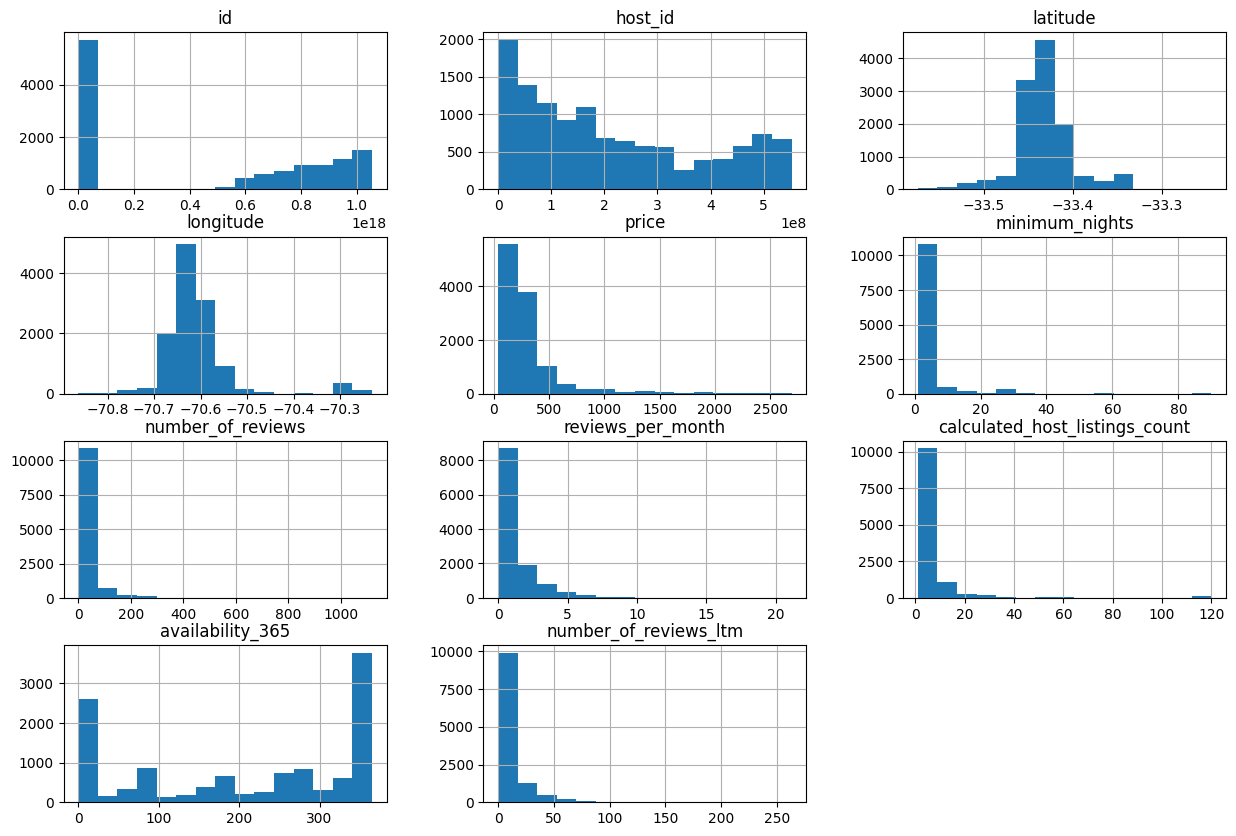

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price > 2700].index, axis = 0, inplace = True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins = 15, figsize = (15,10))

### **Q4. Qual a correlação existente entre as variáveis**

Com base na matriz de correlação abaixo, criamos um heatmap (mapa de calor), que ilustra a força e a direção das relações lineares entre cada par de variáveis. A escala de cores vai de azul (correlações positivas) para vermelho (correlações negativas), com intensidades mais fortes indicando correlações mais fortes.

Com base tanto na matriz de correlação quanto no mapa de calor, é possível observar que:

**price (Preço) e reviews_per_month (Avaliações por Mês):**

Existe uma correlação negativa moderada de -0.16, sugerindo que preços mais altos podem levar a menos avaliações por mês.

**number_of_reviews (Número de Avaliações) e reviews_per_month (Avaliações por Mês):**

Há uma correlação positiva forte de 0.48. Isso indica que propriedades com mais avaliações acumuladas tendem a receber mais avaliações mensais, o que é um comportamento esperado.

**calculated_host_listings_count (Contagem de Anúncios do Anfitrião) e availability_365 (Disponibilidade Anual):**

Uma correlação positiva fraca de 0.10 mostra que anfitriões com mais anúncios tendem a ter um pouco mais de disponibilidade durante o ano.

**price (Preço) e minimum_nights (Noites Mínimas):**

Com uma correlação quase nula de 0.01, parece não haver praticamente nenhuma relação linear entre o preço de uma acomodação e o número mínimo de noites.

**minimum_nights (Noites Mínimas) e number_of_reviews (Número de Avaliações):**

Uma correlação negativa fraca de -0.07 sugere que propriedades que exigem estadias mais longas podem ter ligeiramente menos avaliações.
Observações Gerais:

* As correlações mais fortes neste conjunto de dados estão entre number_of_reviews e reviews_per_month, o que é intuitivo, já que propriedades mais avaliadas teriam tendência a receber mais avaliações regularmente.
* A maioria das outras variáveis apresenta correlações muito fracas entre si, indicando que não há relações lineares fortes entre elas.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.014133,-0.075007,-0.131636,0.034335,0.074496
minimum_nights,0.014133,1.000000,-0.067226,-0.144023,-0.071461,-0.027906
number_of_reviews,-0.075007,-0.067226,1.000000,0.528253,0.011731,-0.025235
reviews_per_month,-0.131636,-0.144023,0.528253,1.000000,0.101863,-0.016942
calculated_host_listings_count,0.034335,-0.071461,0.011731,0.101863,1.000000,0.100787
availability_365,0.074496,-0.027906,-0.025235,-0.016942,0.100787,1.000000


<Axes: >

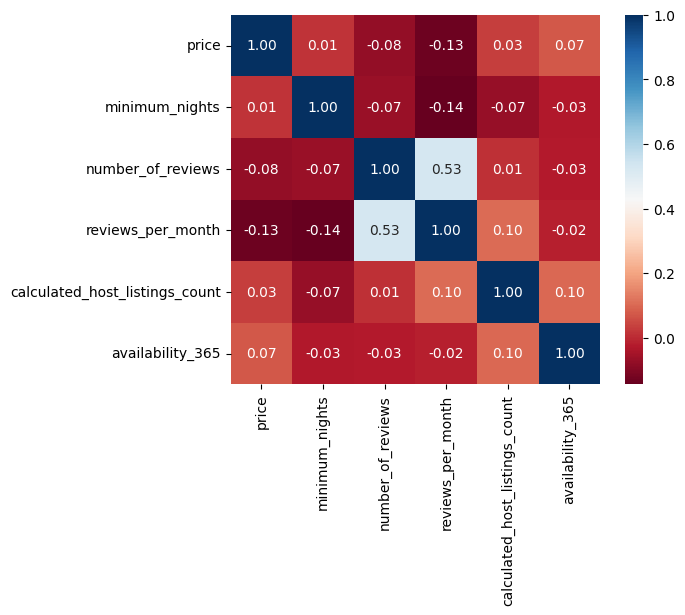

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


room_type
Entire home/apt    8228
Private room       3636
Shared room         163
Hotel room           43
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

room_type
Entire home/apt    0.681690
Private room       0.301243
Shared room        0.013505
Hotel room         0.003563
Name: count, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
Lo Barnechea    1200.513289
Vitacura         507.668127
Las Condes       380.588821
La Granja        373.763102
Huechuraba       344.499674
Pudahuel         329.023115
Lo Espejo        295.213904
Providencia      292.725094
Quilicura        287.273470
San Miguel       251.269276
Name: price, dtype: float64

In [ ]:
# ver quantidade de imóveis no La Granja
print("La Granja:",df_clean[df_clean.neighbourhood == "La Granja"].shape)

# ver quantidade de imóveis no Lo Espejo
print("Lo Espejo:",df_clean[df_clean.neighbourhood == "Lo Espejo"].shape)

# ver quantidade de imóveis no Providencia
print("Providencia:", df_clean[df_clean.neighbourhood == "Providencia"].shape)

# ver quantidade de imóveis no Las Condes
print("Las Condes:", df_clean[df_clean.neighbourhood == "Las Condes"].shape)


La Granja: (10, 16)
Lo Espejo: (2, 16)
Providencia: (2358, 16)
Las Condes: (2070, 16)


<Axes: xlabel='longitude', ylabel='latitude'>

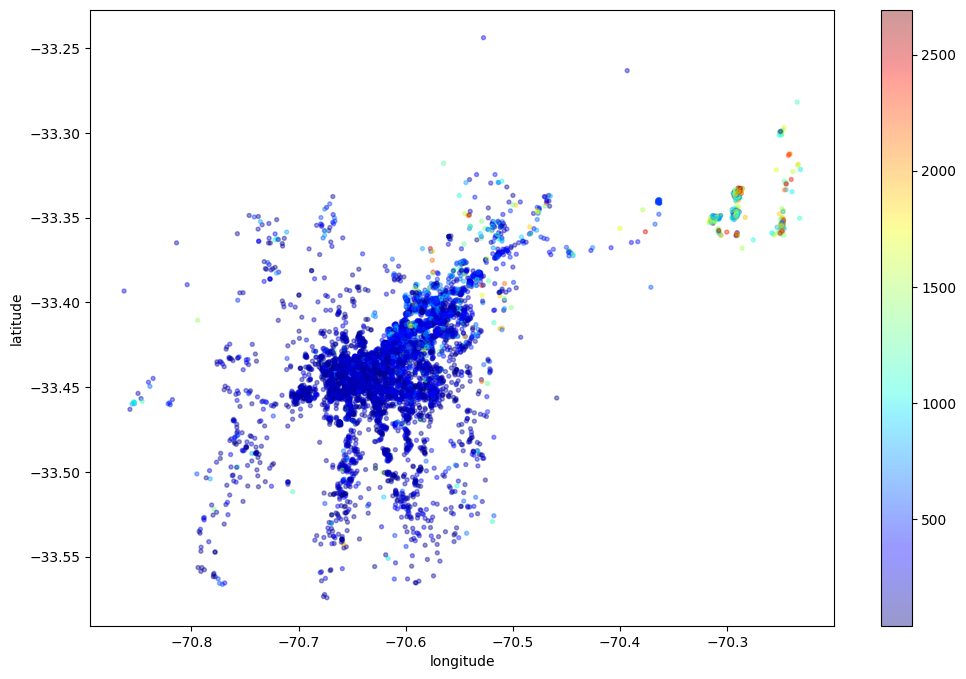

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.059817729908865

### **Q8. Quais localidades tem mais imóveis para alugar?**

In [ ]:
# Contagem de imóveis por bairro
imoveis_por_bairro = df_clean['neighbourhood'].value_counts()

# Calculando as porcentagens
porcentagens = (imoveis_por_bairro / imoveis_por_bairro.sum()) * 100

# Criando um DataFrame com as contagens e as porcentagens
df_bairros = pd.DataFrame({
    'Quantidade': imoveis_por_bairro,
    'Porcentagem': porcentagens
})

# Exibindo o DataFrame
print(df_bairros)

                     Quantidade  Porcentagem
neighbourhood                               
Santiago                   4105    34.009942
Providencia                2358    19.536040
Las Condes                 2070    17.149959
Ñuñoa                       899     7.448219
Lo Barnechea                660     5.468103
Vitacura                    330     2.734051
Recoleta                    251     2.079536
Estación Central            209     1.731566
San Miguel                  148     1.226181
Macul                       145     1.201326
La Florida                  126     1.043911
La Reina                    124     1.027341
Maipú                       104     0.861640
Peñalolén                    82     0.679370
San Joaquín                  68     0.563380
Pudahuel                     63     0.521955
Independencia                62     0.513670
La Cisterna                  58     0.480530
Huechuraba                   46     0.381110
Quinta Normal                42     0.347970
Quilicura 

In [ ]:
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [ ]:
# Agrupando os dados por nome do anfitrião e somando os imóveis listados
host_listings = df.groupby('host_name')['calculated_host_listings_count'].max()

# Ordenando os resultados em ordem decrescente
top_hosts = host_listings.sort_values(ascending=False).head(10)
# Mostrando o resultado

print(top_hosts)


host_name
Andes STR            120
HomChile              57
Diego                 51
Departamentos R&M     39
TudptoenChile         38
Carla                 32
Nicolas               31
Casita                30
Aqc                   29
Bernardo              27
Name: calculated_host_listings_count, dtype: int64


In [ ]:
# Calculando o número total de imóveis listados
total_listings = df_clean.shape[0]

# Agrupando os dados por nome do anfitrião e somando os imóveis listados
host_listings = df.groupby('host_name')['calculated_host_listings_count'].max()

# Ordenando os resultados em ordem decrescente
top_hosts = host_listings.sort_values(ascending=False).head(10)

# Calculando o percentual do total para cada um dos top 10 anfitriões
top_hosts_percent = (top_hosts / total_listings) * 100

# Mostrando o resultado
print(top_hosts_percent)

host_name
Andes STR            0.994200
HomChile             0.472245
Diego                0.422535
Departamentos R&M    0.323115
TudptoenChile        0.314830
Carla                0.265120
Nicolas              0.256835
Casita               0.248550
Aqc                  0.240265
Bernardo             0.223695
Name: calculated_host_listings_count, dtype: float64


## Conclusões


Em uma análise exploratório superficial na base de dados do Airbnb para a cidade de Santiago, porém foi possível detectar a presença de outliers em algumas das variáveis.

No que diz respeito à média de preços por bairros, é preciso observar que algumas das localidades que estão no top10 apresentam poucos imóveis disponíveis, em especial os bairros de La Granja e El Espejo.

Outro ponto interessante é que três bairros (Santiago, Providência e Las Condes) concentram mais de 70% das entradas do dataset, o que pode indicar a necessidade de uma subdivisão em áreas nessas localidades para uma análise mais precisa, tendo em vista que pode haver uma variedade grande na qualidade e no tipo de imóveis em diferentes regiões desses bairros.

Com relação aos anfritiões, percebe-se que o host de nome Andres STR possui quase 1% das propriedades listadas para Santiago. O que indica que não há uma concentração relevante de imóveis por pessoa na cidade.

No que diz respeito à análise de correlação, não se verificou relações lineares fortes entre a variáveis.

Um ponto que talvez valha um aprofundamento é na correlação entre as variáveis price (Preço) e reviews_per_month (Avaliações por Mês).Existe uma correlação negativa moderada de -0.16, sugerindo que preços mais altos podem levar a menos avaliações por mês. Isso também pode indicar que preços mais altos levam a menos aluguéis e, consequentemente, menos avaliações.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com uma quantidade maior de atributos disponíveis.